In [14]:
'''
Assignment 1: Heart Disease Prediction
Dataset: Heart Disease UCI
Link: https://raw.githubusercontent.com/anshulc55/datasets/main/heart.csv
Task:
 Predict whether a patient has heart disease (0/1).
 Handle missing values using mean/median.
 Apply LabelEncoder to categorical columns (cp, thal, slope).
 Apply StandardScaler to all numeric features.
 Train logistic regression and evaluate using Accuracy, Recall & ROC-AUC.

'''

'\nAssignment 1: Heart Disease Prediction\nDataset: Heart Disease UCI\nLink: https://raw.githubusercontent.com/anshulc55/datasets/main/heart.csv\nTask:\n\uf0b7 Predict whether a patient has heart disease (0/1).\n\uf0b7 Handle missing values using mean/median.\n\uf0b7 Apply LabelEncoder to categorical columns (cp, thal, slope).\n\uf0b7 Apply StandardScaler to all numeric features.\n\uf0b7 Train logistic regression and evaluate using Accuracy, Recall & ROC-AUC.\n\n'

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')  ## load the dataset

In [17]:
df ## print the dataset

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [18]:
df.isnull().sum()  ## check the null is present or not in the dataset

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()  ## create object of label encoder

In [21]:
df[['chest_pain_type','thalassemia','slope','sex','fasting_blood_sugar','rest_ecg','exercise_induced_angina']] = df[['chest_pain_type','thalassemia','slope','sex','fasting_blood_sugar','rest_ecg','exercise_induced_angina']].apply(le.fit_transform)   ## fit & transform this column 

In [22]:
df ##  print new dataset 

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,Two,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,Zero,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,Zero,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,One,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,Three,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,2,164,1,0.0,0,Zero,0,1
1021,60,1,3,125,258,1,1,141,1,2.8,1,One,3,0
1022,47,1,3,110,275,1,1,118,1,1.0,1,One,0,0
1023,50,0,3,110,254,1,1,159,0,0.0,0,Zero,0,1


In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
oe = OrdinalEncoder(categories=[['Zero','One','Two','Three','Four']])  ## create object of ordinal encoder

In [25]:
x=df['vessels_colored_by_flourosopy'].values  

In [26]:
oe.fit(x.reshape(-1,1))  ## fit to ordinal encoder to this column 

,categories,"[['Zero', 'One', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [27]:
df['vessels_colored_by_flourosopy'] = oe.transform(x.reshape(-1,1)) ## transform this column by order

In [28]:
oe.categories_ ## see what is the order of this value

[array(['Zero', 'One', 'Two', 'Three', 'Four'], dtype=object)]

In [29]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,2.0,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,0.0,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,0.0,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1.0,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,2,164,1,0.0,0,0.0,0,1
1021,60,1,3,125,258,1,1,141,1,2.8,1,1.0,3,0
1022,47,1,3,110,275,1,1,118,1,1.0,1,1.0,0,0
1023,50,0,3,110,254,1,1,159,0,0.0,0,0.0,0,1


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()  ## create object the standard scaler

In [32]:
df[['age','resting_blood_pressure','cholestoral','Max_heart_rate']] = scaler.fit_transform(df[['age','resting_blood_pressure','cholestoral','Max_heart_rate']])

In [33]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,-0.268437,1,3,-0.377636,-0.659332,1,2,0.821321,0,1.0,0,2.0,3,0
1,-0.158157,1,3,0.479107,-0.833861,0,1,0.255968,1,3.1,2,0.0,3,0
2,1.716595,1,3,0.764688,-1.396233,1,2,-1.048692,1,2.6,2,0.0,3,0
3,0.724079,1,3,0.936037,-0.833861,1,2,0.516900,0,0.0,0,1.0,3,0
4,0.834359,0,3,0.364875,0.930822,0,2,-1.874977,0,1.9,1,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,1,2,0.647366,1,0.0,0,0.0,0,1
1021,0.613800,1,3,-0.377636,0.232705,1,1,-0.352873,1,2.8,1,1.0,3,0
1022,-0.819834,1,3,-1.234378,0.562371,1,1,-1.353113,1,1.0,1,1.0,0,0
1023,-0.488996,0,3,-1.234378,0.155137,1,1,0.429923,0,0.0,0,0.0,0,1


In [34]:
df[['age','resting_blood_pressure','cholestoral','Max_heart_rate']].corr()  ## check correlation

,age,resting_blood_pressure,cholestoral,Max_heart_rate
age,1.000000,0.271121,0.219823,-0.390227
resting_blood_pressure,0.271121,1.000000,0.127977,-0.039264
cholestoral,0.219823,0.127977,1.000000,-0.021772
Max_heart_rate,-0.390227,-0.039264,-0.021772,1.000000


In [35]:
x = df.drop(['target'],axis=1)  ## drop the output column 

In [36]:
y=df['target'].values ## print output column 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)  ## create x_train , x_test , y_train , y_test 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
y_pred = lr.predict(x_test)  ## predict the x_test value using logistic regression

In [43]:
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix,classification_report

In [44]:
mean_absolute_error(y_test,y_pred)  ## check mean absolute error

0.1073170731707317

In [45]:
accuracy_score(y_test,y_pred)  ## print accuracy score of this model

0.8926829268292683

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

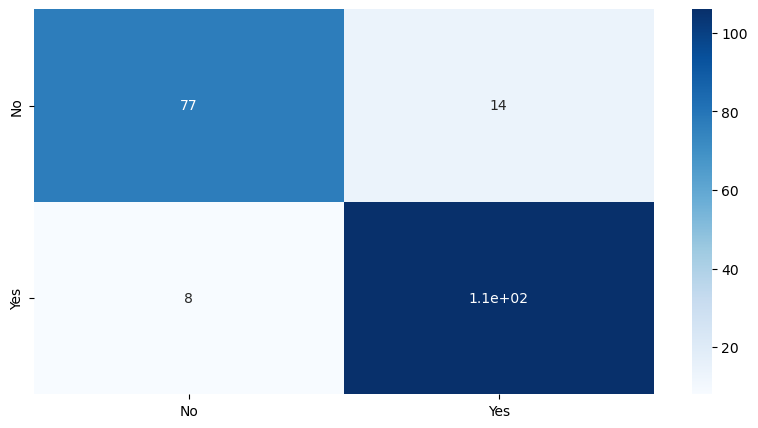

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',yticklabels=['No','Yes'],xticklabels=['No','Yes'],annot=True)  ## print confusion matrix

In [48]:
(y_test == 0).sum()  ## calculate how many zero present in y_test

91

In [49]:
(y_pred==0).sum()  ## calculate how many zero predict the model

85

In [50]:
print(classification_report(y_test,y_pred))  ## print classification report

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        91
           1       0.88      0.93      0.91       114

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



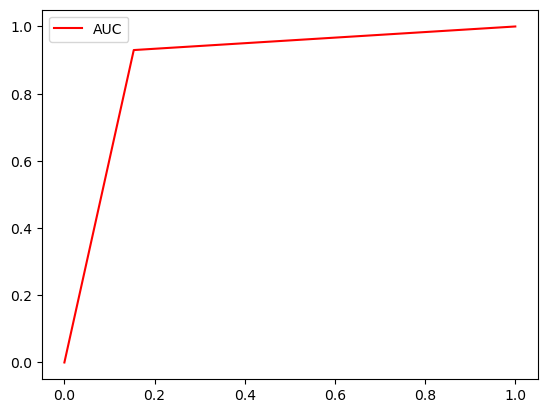

In [51]:
#print AUC ROC curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
plt.figure()
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,color='red',label='AUC')
plt.legend(loc=2)
plt.show()